In [1]:
from sys import path
path.append("..")
from pib_lib import particle_in_a_box as pib
from pib_lib import Special_States as sp
from pib_lib import update_plot as up
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"

In [4]:
L = np.pi
m = 1/(4*np.pi)
a = L/10
l_0 = 40
l_range = 40
T = 4*m*L**2/np.pi

pib_state = sp.Bouncing_Gaussian("dirichlet", L, m, l_0, l_range, a)
rev_time = up.revival_time(pib_state)

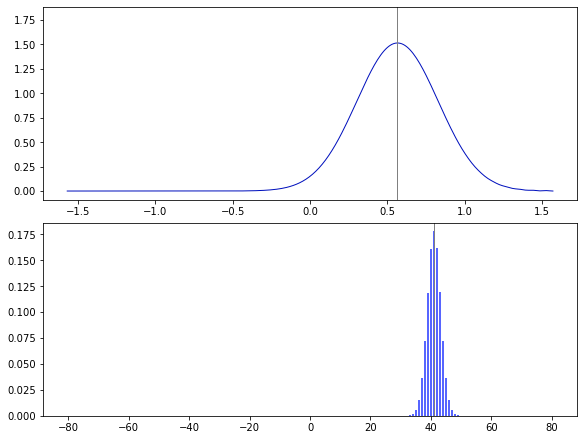

In [9]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1)
ax = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
#ax3 = fig.add_subplot(gs[:,1])

pib_pos_plot_re = up.Pos_Space_Plot(pib_state, "real", fig, ax).plot_config(color=up.mid_blue)
pib_pos_plot_im = up.Pos_Space_Plot(pib_state, "imag", fig, ax).plot_config(color=up.light_blue)
pib_pos_plot_abs = up.Pos_Space_Plot(pib_state, "abs_square", fig, ax)
pib_pos_exp = up.Pos_Expectation_Value(pib_state, fig, ax).plot_config(color="0.5")

pib_k_plot_re = up.Momentum_Space_Plot(pib_state, "real", fig, ax2).plot_config(color=up.mid_red)
pib_k_plot_im = up.Momentum_Space_Plot(pib_state, "imag", fig, ax2).plot_config(color=up.light_red)
pib_k_plot_abs = up.Momentum_Space_Plot(pib_state, "abs_square", fig, ax2).plot_config(color=up.dark_red)
pib_k_exp = up.Momentum_Expectation_Value(pib_state, fig, ax2).plot_config(color="0.5")

pib_newk_plot_re = up.New_Momentum_Space_Plot(pib_state, "real", fig, ax2).plot_config(up.mid_red)
pib_newk_plot_im = up.New_Momentum_Space_Plot(pib_state, "imag", fig, ax2).plot_config(up.light_red)
pib_newk_plot_abs = up.New_Momentum_Space_Plot(pib_state, "abs_square", fig, ax2).plot_config(up.mid_blue).set_n_bound(80)

#pib_exp_line_pos = up.Position_Expectation_Value_Evolution(pib_state, fig, ax3).set_t_range([0, rev_time]).plot_config(color=up.mid_blue)
#pib_exp_line_k = up.Momentum_Expectation_Value_Evolution(pib_state, fig, ax3).set_t_range([0, rev_time]).plot_config(color=up.mid_red)

#c_plot = up.Update_Plot_Collection(fig, pib_pos_plot_re, pib_pos_plot_im, pib_pos_plot_abs, pib_pos_exp, 
#                                    pib_k_exp, pib_k_plot_abs, pib_k_plot_im, pib_k_plot_re,
#                                    pib_newk_plot_im, pib_newk_plot_re, pib_newk_plot_abs,
#                                    pib_exp_line_pos, pib_exp_line_k)
c_plot = up.Update_Plot_Collection(fig, pib_pos_plot_abs, pib_pos_exp, pib_newk_plot_abs, pib_k_exp)
c_plot.anim("t", 0, rev_time/2, 20, 0.1)
#c_plot.set_t(rev_time/2).plot()

<BarContainer object of 31 artists>

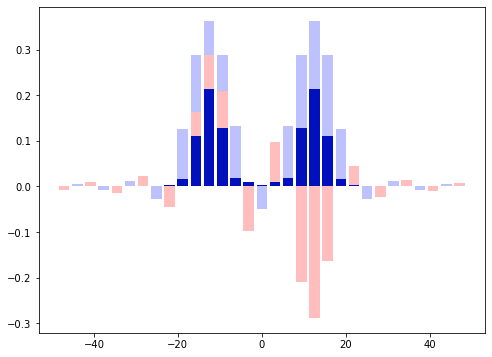

In [3]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
pib_new_momentum_re = up.New_Momentum_Space_Plot(pib_state, "real", fig, ax)
pib_new_momentum_im = up.New_Momentum_Space_Plot(pib_state, "imag", fig, ax)
pib_new_momentum_abs = up.New_Momentum_Space_Plot(pib_state, "abs_square", fig, ax)
pib_new_momentum_re.plot()
pib_new_momentum_im.plot_config(up.light_red)
pib_new_momentum_im.plot()
pib_new_momentum_abs.plot_config(up.dark_blue)
pib_new_momentum_abs.plot()

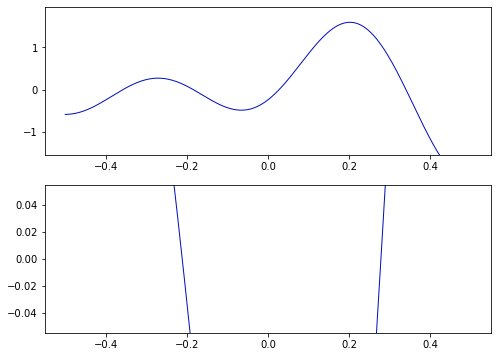

In [4]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(nrows=2, ncols=1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
pib_pos_plot_re = up.Pos_Space_Plot(pib_state, "real", fig, ax1)
pib_pos_plot_im = up.Pos_Space_Plot(pib_state, "imag", fig, ax2)
pib_state.case = "neumann"
pib_pos_plot_re.set_t(1)
pib_pos_plot_im.set_t(1)
c_plot = up.Update_Plot_Collection(fig, pib_pos_plot_re, pib_pos_plot_im)
c_plot.anim("t", 0, 1, 20, 0.1)